In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

# 1.Missing Data

In [ ]:
missing = df["TotalCharges"][df["TotalCharges"] == " "]
missing

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [ ]:
df["TotalCharges"] = df["TotalCharges"].replace(r'^\s*$', np.nan, regex=True)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df["TotalCharges"] = imputer.fit_transform(df["TotalCharges"].values.reshape((-1,1))).flatten()

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                      2283.300441
Churn                                      No
Name: 488, dtype: object

## 2. Visualize the distribution of each continuous feature and distribution of the target.


array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>]], dtype=object)

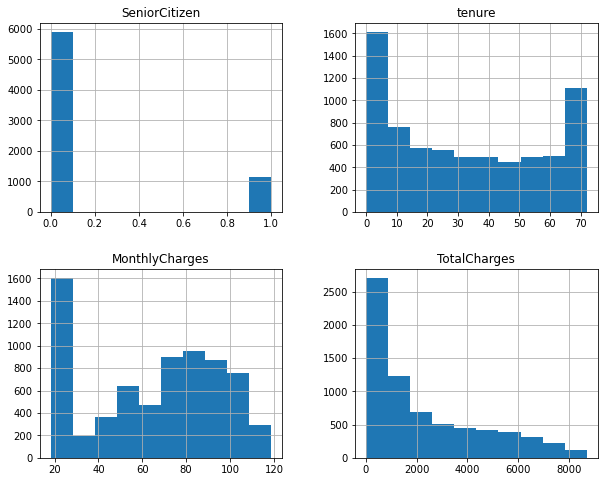

In [ ]:
df.hist(figsize=(10,8))

# 3. Dealing with Categorical Variables

In [ ]:
df_categorical = df.drop(["customerID", "SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"], axis=1)

In [ ]:
df_categorical.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [ ]:
df_num = df.loc[:, ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges"]]
df_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()

one_hot.fit(df_categorical)
X_categorical = one_hot.transform(df_categorical).A

In [ ]:
X_categorical.shape

(7043, 43)

In [ ]:
X_num = df_num.values

In [ ]:
X = np.concatenate([X_categorical, X_num], axis=-1)

In [ ]:
X.shape

(7043, 47)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.iloc[:,-1].values)
y = le.transform(df.iloc[:,-1].values)

In [ ]:
print(X.shape)
print(y.shape)

(7043, 47)
(7043,)


# 4. Split the data into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42, stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(5634, 47)
(1409, 47)


# 5. Build a pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

neighbors = np.arange(1,15,2)
val_scores = []
for i in neighbors:
    pipe_knn = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=i))
    scores = cross_val_score(pipe_knn, X_train, y_train, cv=10)
    val_scores.append(np.mean(scores))
best_n_neighbors = neighbors[np.argmax(val_scores)]
print(f'best neighbor {best_n_neighbors}')

best neighbor 5


# 6. GridSearchCV and Visualize the performance

In [ ]:
from sklearn.model_selection import GridSearchCV

knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
param_grid = {'kneighborsclassifier__n_neighbors':range(1,15,2), 'kneighborsclassifier__p':[1,2]}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.score(X_test,y_test))

{'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__p': 2}
0.9829666430092264


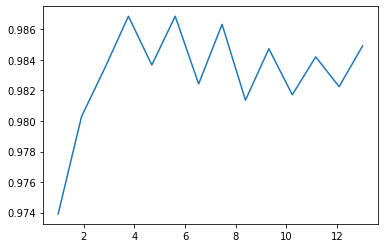

In [ ]:
plt.plot(np.linspace(1,13,14), grid.cv_results_['mean_test_score'])